In [1]:
!which python
!python --version

/home/dmitry/python_default/bin/python
Python 3.10.12


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
bench = pd.read_csv("bench - fast_txs_valid_off.csv")
bench

,total_txns,contract_num,tx_per_contract,block_size_1t,block_size_1t_opt,block_size_8t,conflict_rate_8t,block_size_2t,conflict_rate_2t,block_size_4t,conflict_rate_4t
0,5000,1,5000,340.0,348.0,NaN,NaN,NaN,NaN,NaN,NaN
1,5000,2,2500,348.0,341.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5,1000,335.0,345.0,283.0,75.0,310.0,49.0,353.0,61.0
3,5000,10,500,330.0,348.0,296.0,74.0,321.0,49.0,335.0,60.0
4,5000,50,100,337.0,354.0,288.0,73.0,337.0,47.0,366.0,59.0
5,5000,100,50,339.0,344.0,310.0,72.0,348.0,45.0,422.0,58.0
6,5000,250,20,335.0,335.0,419.0,70.0,409.0,39.0,496.0,54.0
7,5000,500,10,335.0,345.0,609.0,64.0,525.0,28.0,548.0,44.0
8,5000,1000,5,334.0,347.0,808.0,45.0,539.0,13.0,714.0,28.0
9,5000,2500,2,326.0,334.0,845.0,0.0,554.0,0.0,704.0,0.0


/tmp/ipykernel_27469/2662571809.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


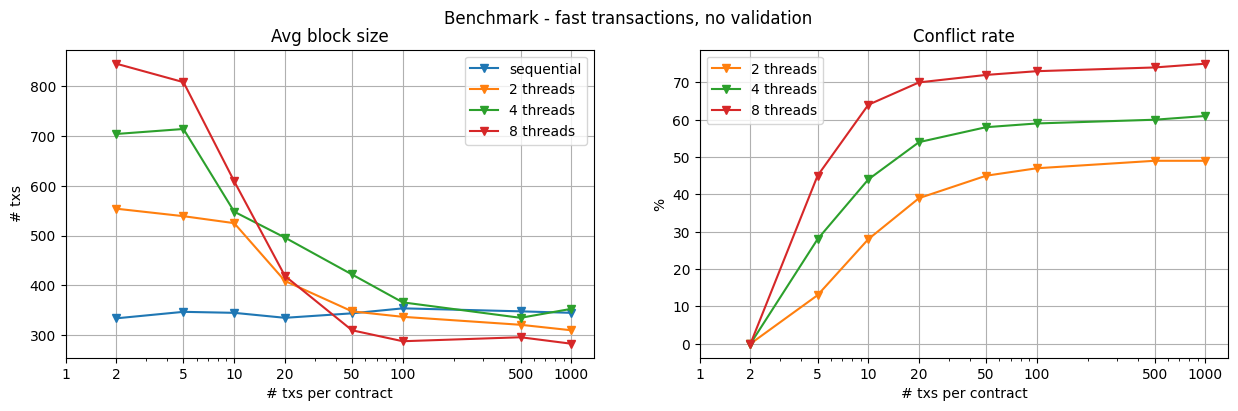

In [4]:
def draw_bench(df, validation=False, *, save_file=None, suptitle="Benchmark"):
    fig, axis = plt.subplots(1, 2, figsize=(15, 4))
    grid = df["tx_per_contract"]
    axis[0].plot(grid, df["block_size_1t_opt"], "v-", label="sequential")
    axis[0].plot(grid, df["block_size_2t"], "v-", label="2 threads")
    axis[0].plot(grid, df["block_size_4t"], "v-", label="4 threads")
    axis[0].plot(grid, df["block_size_8t"], "v-", label="8 threads")

    if validation:
        axis[1].plot(grid, df["validerr_rate_1t_opt"], "v-", label="sequential")
    else:
        axis[1].plot([], [])
    axis[1].plot(grid, df["validerr_rate_2t" if validation else "conflict_rate_2t"], "v-", label="2 threads")
    axis[1].plot(grid, df["validerr_rate_4t" if validation else "conflict_rate_4t"], "v-", label="4 threads")
    axis[1].plot(grid, df["validerr_rate_8t" if validation else "conflict_rate_8t"], "v-", label="8 threads")

    for ax in axis:
        ax.legend()
        ax.grid()
        ax.set_xscale("log")
        ax.set_xticks(df["tx_per_contract"].values, df["tx_per_contract"].values)
        ax.set_xlabel("# txs per contract")
    axis[0].set_ylabel("# txs")
    axis[0].set_title("Avg block size")
    axis[1].set_ylabel("%")
    axis[1].set_title("Validation error rate" if validation else "Conflict rate")
    
    fig.suptitle(suptitle)
    if save_file is not None:
        fig.savefig(save_file, bbox_inches="tight")
    fig.show()

draw_bench(bench[2:], suptitle="Benchmark - fast transactions, no validation", save_file="bench - fast_txs_valid_off.png")

In [5]:
bench_rw = pd.read_csv("bench - rwintense_txs_valid_off.csv")
bench_rw

,total_txns,contract_num,tx_per_contract,block_size_1t,block_size_1t_opt,block_size_8t,conflict_rate_8t,block_size_2t,conflict_rate_2t,block_size_4t,conflict_rate_4t
0,2000,1,2000,NaN,NaN,NaN,NaN,NaN,NaN,75.0,75.0
1,2000,2,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,4,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,10,200,122.0,122.0,69.0,84.0,109.0,49.0,87.0,74.0
4,2000,20,100,121.0,119.0,71.0,83.0,112.0,49.0,95.0,73.0
5,2000,50,40,118.0,119.0,87.0,81.0,133.0,46.0,113.0,71.0
6,2000,100,20,120.0,118.0,126.0,77.0,138.0,39.0,134.0,67.0
7,2000,200,10,119.0,120.0,206.0,68.0,189.0,29.0,204.0,56.0
8,2000,500,4,120.0,117.0,349.0,38.0,197.0,4.0,291.0,29.0
9,2000,1000,2,117.0,117.0,351.0,0.0,190.0,0.0,286.0,0.0


/tmp/ipykernel_27469/2662571809.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


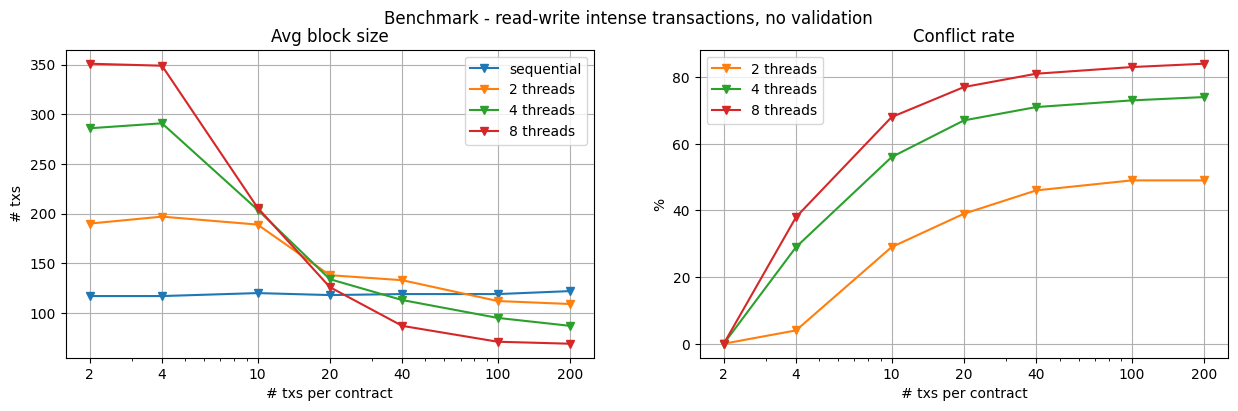

In [6]:
draw_bench(bench_rw[3:-1], 
           suptitle="Benchmark - read-write intense transactions, no validation", 
           save_file="bench - rwintense_txs_valid_off.png")

In [7]:
bench_val = pd.read_csv("bench - fast_txs_valid_on.csv")
bench_val

,total_txns,contract_num,tx_per_contract,block_size_1t,validerr_rate_1t,block_size_1t_opt,validerr_rate_1t_opt,block_size_8t,validerr_rate_8t,block_size_2t,validerr_rate_2t,block_size_4t,validerr_rate_4t
0,1600,1,1600,143,50,154,54,NaN,NaN,NaN,NaN,NaN,NaN
1,1600,2,800,153,43,157,50,NaN,NaN,NaN,NaN,NaN,NaN
2,1600,4,400,154,36,159,36,NaN,NaN,NaN,NaN,NaN,NaN
3,1600,10,160,156,19,161,27,12.0,95.0,20.0,94.0,13.0,95.0
4,1600,20,80,167,14,163,17,18.0,92.0,35.0,89.0,26.0,92.0
5,1600,40,40,170,6,167,14,38.0,82.0,59.0,82.0,45.0,86.0
6,1600,100,16,182,1,173,8,108.0,65.0,120.0,63.0,104.0,69.0
7,1600,200,8,176,2,181,5,180.0,45.0,181.0,40.0,165.0,53.0
8,1600,400,4,173,1,179,2,219.0,21.0,209.0,25.0,221.0,30.0
9,1600,800,2,171,0,173,0,236.0,12.0,239.0,12.0,287.0,13.0


/tmp/ipykernel_27469/2662571809.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


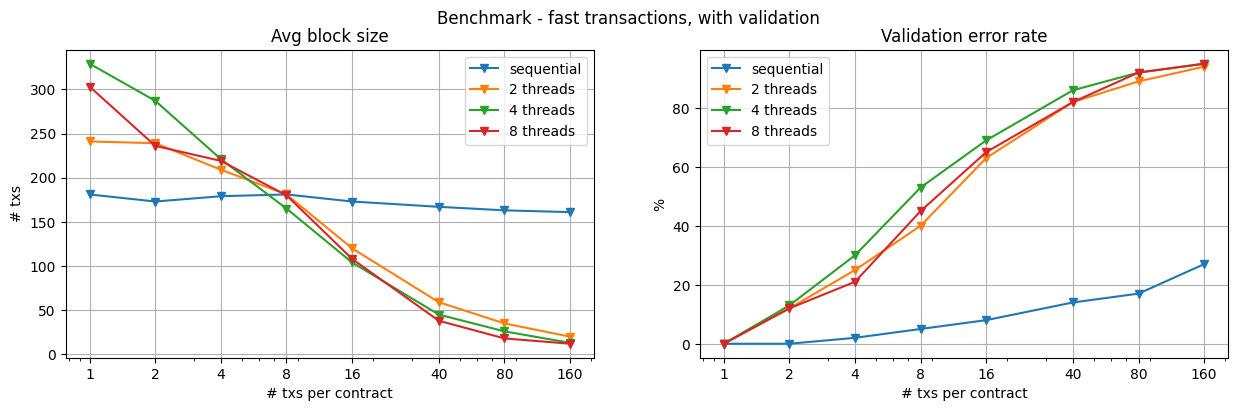

In [8]:
draw_bench(bench_val[3:], True,
           suptitle="Benchmark - fast transactions, with validation", 
           save_file="bench - fast_txs_valid_on.png")